In [8]:
from module.pianoRollExtractor import PianoRollExtractor

pre = PianoRollExtractor("select-midi/1238.midi")

In [9]:
import numpy as np

data = pre.get_piano_roll(start=2, end=22)
data = np.array([data])

print(data.shape)

(1, 480, 128)


In [10]:
from module.pianoRollGAN import GAN

model = GAN()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 61440)             0         
                                                                 
 dense_7 (Dense)             (None, 512)               31457792  
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 31589377 (120.50 MB)
Trainable params: 3

In [11]:
model.train(150, data, batch_size=1)

1/1 [==============================] - 0s 76ms/step
(1, 480, 128)
0 [D loss: 4.885600, acc.: 50.00%] [G loss: 298.058777]
1/1 [==============================] - 0s 16ms/step
(1, 480, 128)
1 [D loss: 0.700009, acc.: 50.00%] [G loss: 549.066284]
1/1 [==============================] - 0s 17ms/step
(1, 480, 128)
2 [D loss: 0.000000, acc.: 100.00%] [G loss: 613.959656]
1/1 [==============================] - 0s 17ms/step
(1, 480, 128)
3 [D loss: 0.000000, acc.: 100.00%] [G loss: 625.789917]
1/1 [==============================] - 0s 17ms/step
(1, 480, 128)
4 [D loss: 0.000000, acc.: 100.00%] [G loss: 621.699890]
1/1 [==============================] - 0s 17ms/step
(1, 480, 128)
5 [D loss: 0.000000, acc.: 100.00%] [G loss: 611.252808]
1/1 [==============================] - 0s 21ms/step
(1, 480, 128)
6 [D loss: 0.000000, acc.: 100.00%] [G loss: 597.102173]
1/1 [==============================] - 0s 17ms/step
(1, 480, 128)
7 [D loss: 0.000000, acc.: 100.00%] [G loss: 580.193054]
1/1 [=============

In [15]:
result = model.predict()
result = result.reshape(480, 128)
result = (result < 0.5)
result = result.astype(bool)

1/1 [==============================] - 0s 21ms/step


In [16]:
res_piano_roll = PianoRollExtractor(pianoRoll=result)


fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter '/home/Yukiche/.fluidsynth/default_sound_font.sf2' not a SoundFont or MIDI file or error occurred identifying it.


FluidSynth runtime version 2.3.4
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'result.wav'..


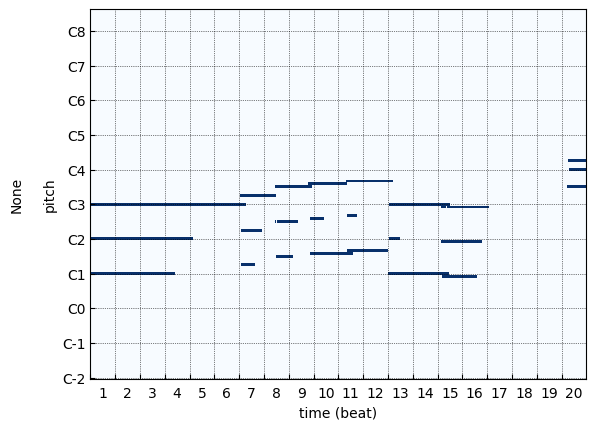

In [17]:
res_piano_roll.plot()

res_piano_roll.save_as_wav("result.wav")